## Disney+ Movies & TV Shows

#### **Table of Contents**
- [1. Import and Data Exploration](#1-import-libraries-and-data-exploration)
- [2. Data Cleaning](#2-data-cleaning)
  - [(a) Drop Duplicates](#a-drop-duplicates)
  - [(b) Take Care of Missing Data](#b-take-care-of-missing-data)
  - [(c) Creating New Columns](#c-creating-new-columns)
  - [(d) Splitting DataFrame](#d-splitting-dataframe)
- [3. Questions & Answers](#3-questions-and-answers)
  - [Q1. Who is the most casted TV show actor, and how many TV shows are they a part of? What about Movies?](#q1-who-is-the-most-casted-tv-show-actor-and-how-many-tv-shows-are-they-a-part-of-what-about-movies)
  - [Q2. What percentage of movies have a duration longer than 80 minutes?](#q2-what-percentage-of-movies-have-a-duration-longer-than-80-minutes)
  - [Q3. Which directors have the most movies on Disney+?](#q3-which-directors-have-the-most-movies-on-disney)
  - [Q4. What are the top 10 genres on Disney+? Also, how the genres have changed over time?](#q4-what-are-the-top-10-genres-on-disney-also-how-the-genres-have-changed-over-time)
  - [Q5. Were there more or less family-friendly movies and TV shows over time?](#q5-were-there-more-or-less-family-friendly-movies-and-tv-shows-over-time)
  - [Q6. Did the duration of movies get longer or shorter over time?](#q6-did-the-duration-of-movies-get-longer-or-shorter-over-time)

### 1. Import Libraries and Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import custom_functions
from collections import Counter

disney = pd.read_csv('disney_plus_titles.csv')

disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [2]:
disney.groupby('type')['show_id'].count()

type
Movie      1052
TV Show     398
Name: show_id, dtype: int64

In [3]:
disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [4]:
print(f'DataFrame shape is {disney.shape}')

DataFrame shape is (1450, 12)


### 2. Data Cleaning

#### (a) Drop Duplicates

In [5]:
unique_show_id_len = len(disney['show_id'].unique())
print(f'There are {unique_show_id_len} unique show_id values, which means that there is no duplicate data.')

# Just in case, we delete any duplicate data
disney = disney.drop_duplicates(subset=['show_id'], keep='first')

There are 1450 unique show_id values, which means that there is no duplicate data.


#### (b) Take care of missing data

In [6]:
# Check for NAs
nan_table_start = disney.isna().sum()
print(f'NAs at the beggining: \n{nan_table_start}')

# Check for rows with at least one NA
rows_with_na = disney.isnull().any(axis=1).sum()
print(f'\nRows with at least one NA: {rows_with_na}')

NAs at the beggining: 
show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

Rows with at least one NA: 632


In [7]:
# Filling Rating NAs manually because there is only 3 NAs
print(disney[disney['rating'].isna()].loc[:, ['title', 'rating']])

# 	    title	                        rating
# 4	    The Beatles: Get Back	        NaN
# 276	Disney My Music Story: Perfume	NaN
# 280	Marvel Studios ASSEMBLED	    NaN

print(disney[disney['date_added'].isna()].loc[:, ['title', 'date_added']])

#                      title date_added
# 1439  Disney Kirby Buckets        NaN
# 1440        Disney Mech-X4        NaN
# 1441    Imagination Movers        NaN


                              title rating
4             The Beatles: Get Back    NaN
276  Disney My Music Story: Perfume    NaN
280        Marvel Studios ASSEMBLED    NaN
                     title date_added
1439  Disney Kirby Buckets        NaN
1440        Disney Mech-X4        NaN
1441    Imagination Movers        NaN


In [8]:
disney.loc[[4,276,280], 'rating'] = 'TV-14'

In [9]:
# There are 632 rows with at least 1 null value. For each of them, we used OMDB API to fill the missing values.

n_data_exist = 0
n_modified_directors = 0
n_modified_actors = 0
n_modified_country = 0

for index, row in disney[disney.isnull().any(axis=1)].iterrows():

    # Using custom function to get the JSON data of the movie with NA values
    data = custom_functions.get_omdb_data(row['title'], row['release_year'])

    # If the data does not exist, we skip the row
    if pd.isna(data):
        continue

    # If the data exists, we fill the NA values with the data
    else:
        n_data_exist += 1

        if pd.isna(row['director']) and (data['Director'] != 'N/A'):
            disney.loc[index, 'director'] = data['Director']

            n_modified_directors += 1
        
        if pd.isna(row['cast']) and (data['Actors'] != 'N/A'):
            disney.loc[index, 'cast'] = data['Actors']

            n_modified_actors += 1
        
        if pd.isna(row['country']) and (data['Country'] != 'N/A'):
            disney.loc[index, 'country'] = data['Country']

            n_modified_country += 1


print(f'''
Out of 632, {n_data_exist} times we found the matching data using OMDB API.
\nWe modified {n_modified_directors} rows with director and {n_modified_actors} rows with actors.
\nWe modified {n_modified_country} rows with country.
''')



Out of 632, 354 times we found the matching data using OMDB API.

We modified 31 rows with director and 110 rows with actors.

We modified 80 rows with country.



In [10]:
# The result of filling NA values using REST API
nan_table_end = disney.isna().sum()
print(f'NAs at the end: \n{nan_table_end}')

NAs at the end: 
show_id           0
type              0
title             0
director        442
cast             80
country         139
date_added        3
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64


In [11]:
# Replacing 'N/A', 'N.A.', 'N.A', 'N/A.', 'N/A', np.nan, None with empty string
disney = disney.replace([np.nan, 'N/A'], '')

#### (c) Creating New Columns

In [12]:
# Creating `duration_int` to see new column of duration without “min”
disney['duration_int'] = disney['duration'].str.strip('min')

# Creating `family_friendly` column to see if the movie is family friendly
disney['rating'].unique()
# There are 9 unique ratings: ['TV-G', 'PG', 'TV-PG', 'PG-13', 'TV-14', 'G', 'TV-Y7', 'TV-Y', 'TV-Y7-FV']

# 'TV-G', 'PG', 'TV-PG', 'G', 'TV-Y7', 'TV-Y', 'TV-Y7-FV' are family friendly
# 'PG-13', 'TV-14' are NOT family friendly
family_friendly = ['TV-G', 'PG', 'TV-PG', 'G', 'TV-Y7', 'TV-Y', 'TV-Y7-FV']
disney['family_friendly'] = disney['rating'].isin(family_friendly)

# Changing `date_added` column to datetime and creating `year_added`, 'month_added`, `day_added` column based on it
disney['date_added'] = pd.to_datetime(disney['date_added'])
disney['year_added'] = disney['date_added'].dt.year
disney['month_added'] = disney['date_added'].dt.month
disney['day_added'] = disney['date_added'].dt.day

In [13]:
disney[['title','duration_int', 'family_friendly']].head()

,title,duration_int,family_friendly
0,Duck the Halls: A Mickey Mouse Christmas Special,23,True
1,Ernest Saves Christmas,91,True
2,Ice Age: A Mammoth Christmas,23,True
3,The Queen Family Singalong,41,True
4,The Beatles: Get Back,1 Seaso,False


#### (d) Splitting DataFrame

In [14]:
## Splitting the data by type
disney_movies, disney_tv_shows = [i for i, i in disney.groupby(disney['type'] == 'TV Show')]

In [15]:
disney_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,family_friendly,year_added,month_added,day_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,23,True,2021.0,11.0,26.0
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,91,True,2021.0,11.0,26.0
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,23,True,2021.0,11.0,26.0
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",41,True,2021.0,11.0,26.0
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,94,False,2021.0,11.0,24.0


### 3. Questions And Answers

In [16]:
# This function gets column name and DataFrame as the parameter and returns the counter that could be used to answer many 
# questions about the data.
def column_to_counter(column_name: str, data_frame: pd.DataFrame) -> pd.Series:
    starting_list = []

    # Creating the list of strings from df
    for item in data_frame[column_name]:
        # if (item is not None) or (item != 'NaN'):
            item_split = str(item).split(',')
            item_strip = [x.strip() for x in item_split if x]

            starting_list += item_strip
    
    # Creating DataFrame to groupby, sort_values, and plot
    starting_list_df = pd.DataFrame(starting_list, columns = [column_name])

    # Creating the counter
    counter = starting_list_df.groupby(column_name)[column_name].count().sort_values(ascending = False)

    return counter

#### Q1. Who is the most casted TV show actor and how many TV shows are they a part of? What about Movies?

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

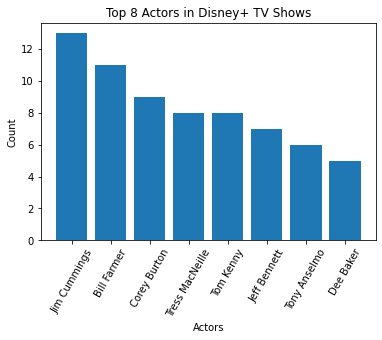

In [17]:
counter_tv_shows = column_to_counter('cast', disney_tv_shows)

plt.bar(counter_tv_shows.index[:8],counter_tv_shows.values[:8])
plt.xlabel('Actors')
plt.ylabel('Count')
plt.title('Top 8 Actors in Disney+ TV Shows')
plt.xticks(rotation = 60)

cast
Pinto Colvig           41
Clarence Nash          36
Walt Disney            30
Jim Cummings           20
Larry the Cable Guy    19
James MacDonald        17
Tim Allen              14
Bob Peterson           14
Name: cast, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

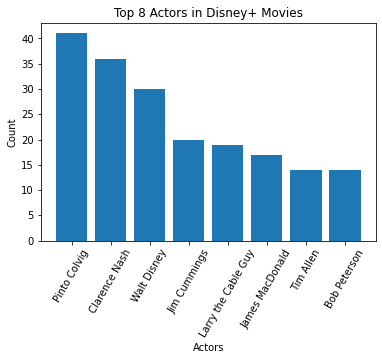

In [18]:
counter_movies = column_to_counter('cast', disney_movies)
print(counter_movies[:8])

plt.bar(counter_movies.index[:8],counter_movies.values[:8])
plt.xlabel('Actors')
plt.ylabel('Count')
plt.title('Top 8 Actors in Disney+ Movies')
plt.xticks(rotation = 60)

Answer: Jim Cummings is the most casted TV show actor. He is a part of 13 TV shows on Disney+.

Pinto Colvig is the most casted actor in movie. He has 41 movies on Disney+

#### Q2. What percentage of movies have a duration longer than 80 minutes?

44.20152091254753


Text(0.5, 1.0, 'Average Duration of Disney+ Movies by Release Year')

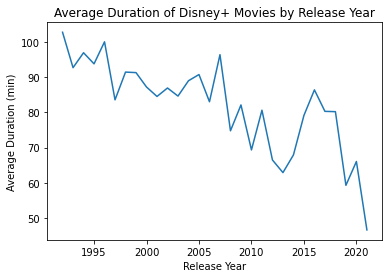

In [19]:
disney_movies['duration_int'] = disney_movies['duration_int'].astype(int)
print(sum(disney_movies['duration_int'] > 88) / len(disney_movies) * 100)

disney_movies.groupby('release_year')['duration_int'].mean()[-30:].plot()
plt.xlabel('Release Year')
plt.ylabel('Average Duration (min)')
plt.title('Average Duration of Disney+ Movies by Release Year')

Answer: 44.20% of the movies have a duration of more than 80 minutes

#### Q3. Which directors have the most movies on Disney+?

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

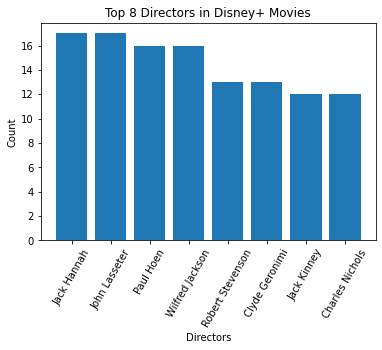

In [20]:
director_count_movie = column_to_counter('director', disney_movies)

plt.bar(director_count_movie.index[:8],director_count_movie.values[:8])
plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Top 8 Directors in Disney+ Movies')
plt.xticks(rotation = 60)

#### Answer: Jack Hannah, an American animator, writer, and director, has worked with Disney+ movies/tv shows the most. He worked on 17 movies and tv shows.

#### Q4. What are the top 10 genres on Disney+? Also, how the genres have changed over time?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

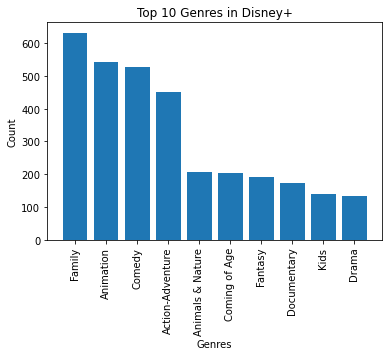

In [21]:
genre_counter = column_to_counter('listed_in', disney)

plt.bar(genre_counter.index[:10],genre_counter.values[:10])
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 10 Genres in Disney+')
plt.xticks(rotation = 90)

In [22]:
from collections import defaultdict

Text(0.5, 0, 'Years')

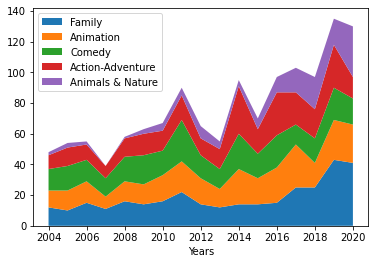

In [23]:
genre_counter = column_to_counter('listed_in', disney)
unique_genres_init = dict.fromkeys(genre_counter.index[:], 0)

data = defaultdict(list)
genres = disney['listed_in']
years = []

disney_groupby = disney.groupby('release_year')['listed_in']

for year, series in disney_groupby:
    unique_genres_dict = dict.fromkeys(unique_genres_init, 0)

    series_1 = [x.strip() for x in series if x]
    series_2 = ','.join(series_1)
    series_3 = series_2.split(',')
    series_4 = [x.strip() for x in series_3 if x]
    genre_counter = Counter(series_4)

    if 2021 > year > 2003:
        years.append(year)

        for genre in genre_counter:
            unique_genres_dict[genre] = genre_counter[genre]
        
        for key, value in unique_genres_dict.items():
            data[key].append(value)

plt.stackplot(years, list(data.values())[:5], labels = list(data.keys())[:5])
plt.legend(loc='upper left')
plt.xlabel('Years')


Answer: The top 3 movie genres are Family, Animation, and Comedy.

#### Q5. Were there more or less family-friendly movies and TV shows over time?


Text(0.5, 1.0, 'Disney+ TV Shows and Movies by Release Year and Rating')

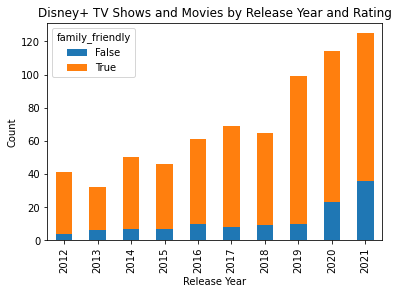

In [24]:
family_friendly_groupby = disney.groupby(['release_year','family_friendly'])['show_id'].count().unstack()
family_friendly_groupby[-10:].plot(kind = 'bar', stacked = True)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Disney+ TV Shows and Movies by Release Year and Rating')

#### Answer: The number of family-friendly movies and TV shows increased over time

#### Q6. Did the duration of movies get longer or shorter over time?

Text(0, 0.5, 'Average Duration in Minutes')

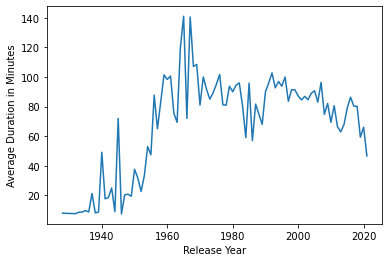

In [25]:
dismovdur = disney_movies.groupby('release_year')['duration_int'].mean()
dismovdur.plot(kind = 'line')
plt.xlabel('Release Year')
plt.ylabel('Average Duration in Minutes')

Answer: The duration of movies peaked in the 1960's, and has been decreasing since then